In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #eaf4f4; /* Changed background color */
    border-radius: 10px; 
    font-family: 'Arial', sans-serif;
    line-height: 1.6;">

<h2 style="color: #2F4F4F;">📊 Telco Customer Churn Dataset Analysis</h2>

<p style="color: #333333;">
    <strong>Dataset Source:</strong> 
    The Telco Customer Churn dataset is provided by a telecommunications company to analyze customer churn behavior. This dataset is available on 
    <a href="https://www.kaggle.com/blastchar/telco-customer-churn" target="_blank" style="color: #1E90FF; text-decoration: none;">Kaggle</a>.
</p>

<h3 style="color: #2F4F4F;">Purpose of Analysis</h3>
<p style="color: #333333;">
    The primary goal of this project is to perform <strong>Exploratory Data Analysis (EDA)</strong> and build <strong>Machine Learning Models</strong> to predict customer churn. The following key objectives are targeted:
</p>

<ul style="color: #333333;">
    <li>📈 <strong>EDA:</strong> Understand the underlying patterns and distributions in the dataset by visualizing the data.</li>
    <li>🔍 <strong>Feature Engineering:</strong> Identify and preprocess key features that affect customer churn.</li>
    <li>🤖 <strong>Machine Learning:</strong> Develop classification models to accurately predict whether a customer will churn or not.</li>
    <li>⚙️ <strong>Hyperparameter Tuning:</strong> Optimize the performance of models using techniques like GridSearchCV.</li>
</ul>

<h3 style="color: #2F4F4F;">Dataset Description</h3>
<p style="color: #333333;">
    The dataset contains information about various customer attributes such as:
</p>

<ul style="color: #333333;">
    <li>👥 <strong>Demographics:</strong> Gender, Senior Citizen status, etc.</li>
    <li>📱 <strong>Services:</strong> Internet service, Online security, Streaming TV, etc.</li>
    <li>💸 <strong>Billing Information:</strong> Monthly charges, Total charges, Payment method, etc.</li>
    <li>📅 <strong>Tenure:</strong> Duration of the customer's relationship with the company.</li>
    <li>🚪 <strong>Churn:</strong> Whether the customer has churned or not (target variable).</li>
</ul>

<p style="color: #333333;">
    By analyzing this dataset, we can identify the key factors that contribute to customer churn, allowing the company to take proactive measures to retain customers.
</p>

</div>


In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f9f9f9; 
    border-radius: 10px; 
    font-family: 'Arial', sans-serif;
    line-height: 1.6;">

<h2 style="color: #2F4F4F; background-color: #d4edda; padding: 10px; border-radius: 5px;">🔍 Data Preprocessing and Univariate Analysis</h2>

<p style="color: #333333;">
    The following steps are taken to preprocess the data and perform univariate analysis on categorical features. This helps in understanding the distribution and frequency of different categories in the dataset.
</p>

<h3 style="color: #2F4F4F; background-color: #d1ecf1; padding: 8px; border-radius: 5px;">1️⃣ Data Preprocessing: Converting 'TotalCharges' to Numeric</h3>
<p style="color: #333333;">
    The <strong>'TotalCharges'</strong> column in the dataset is expected to be numerical. However, it may contain some non-numeric values. To handle this:
</p>
<ul style="color: #333333;">
    <li>We use <strong>pd.to_numeric()</strong> to convert the column to a numeric data type.</li>
    <li>Non-numeric values are coerced to <strong>NaN</strong>, allowing us to handle them appropriately during further analysis.</li>
</ul>

<h3 style="color: #2F4F4F; background-color: #d1ecf1; padding: 8px; border-radius: 5px;">2️⃣ Univariate Analysis: Categorical Features Distribution</h3>
<p style="color: #333333;">
    To understand the distribution of categorical features, we:
</p>
<ul style="color: #333333;">
    <li>Select all columns that are of <strong>object</strong> data type, representing categorical features.</li>
    <li>Create count plots using <strong>Seaborn's countplot()</strong> to visualize the distribution of each categorical feature.</li>
    <li>Apply <strong>rotation</strong> to the x-axis labels to ensure readability, especially for features with longer category names.</li>
</ul>

<h3 style="color: #2F4F4F; background-color: #d1ecf1; padding: 8px; border-radius: 5px;">Key Insights</h3>
<p style="color: #333333;">
    Understanding the distribution of categorical features helps in identifying any potential imbalances in the data, which may need to be addressed before modeling. It also provides insights into customer behavior and preferences, which are crucial for predicting churn.
</p>

<p style="color: #333333;">
    Visualizing this distribution enables us to detect any irregularities or patterns that might influence customer churn. For instance, we can observe which categories are more dominant and how they relate to customer churn behavior.
</p>

</div>


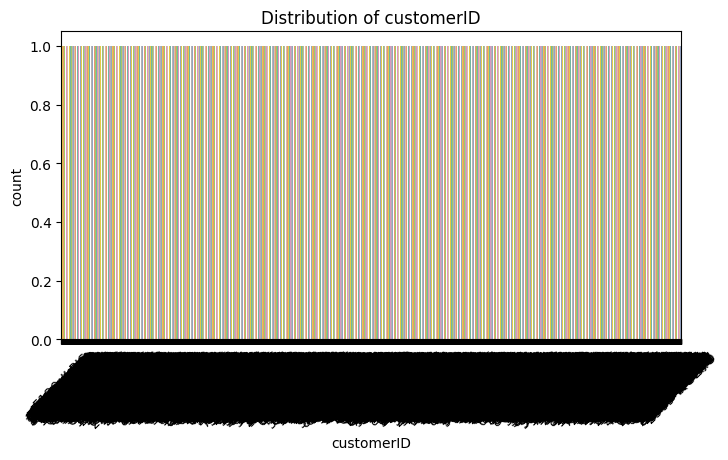

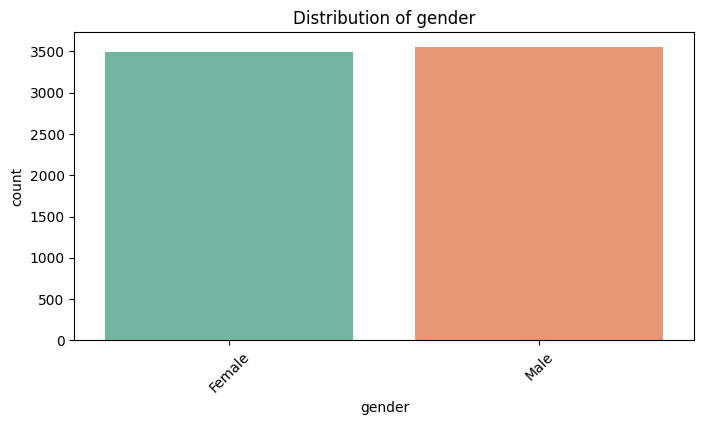

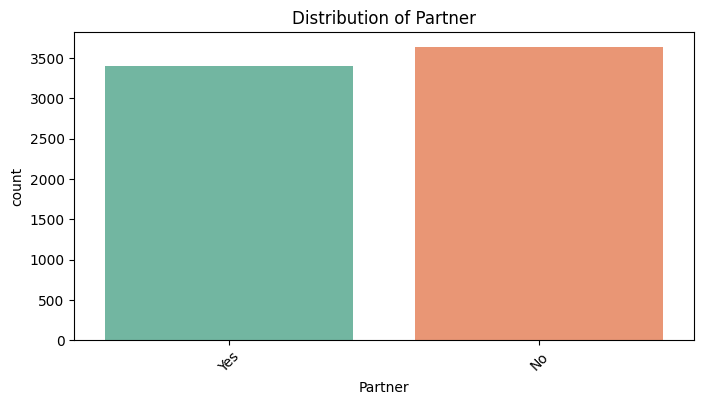

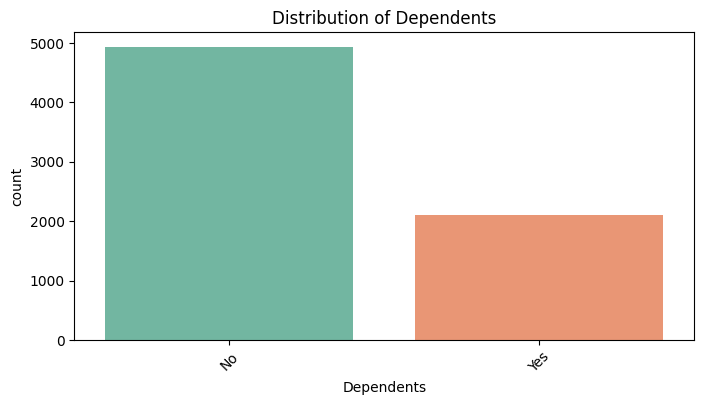

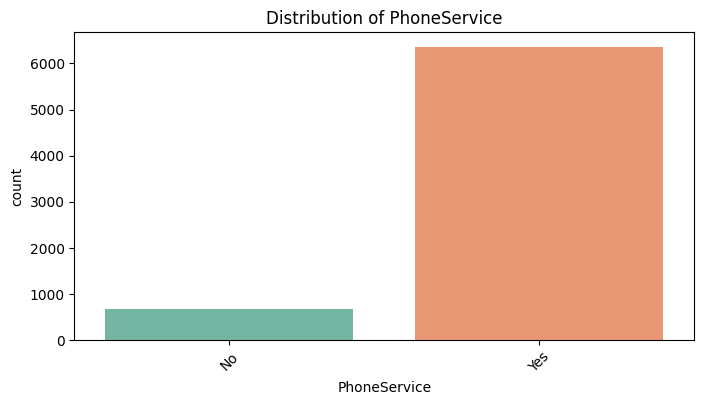

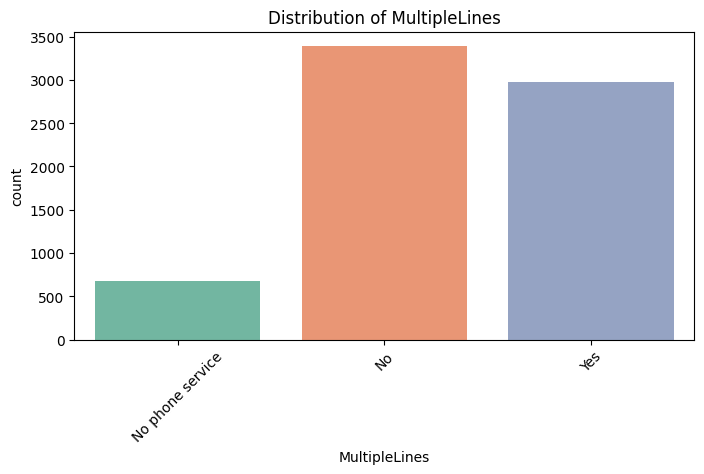

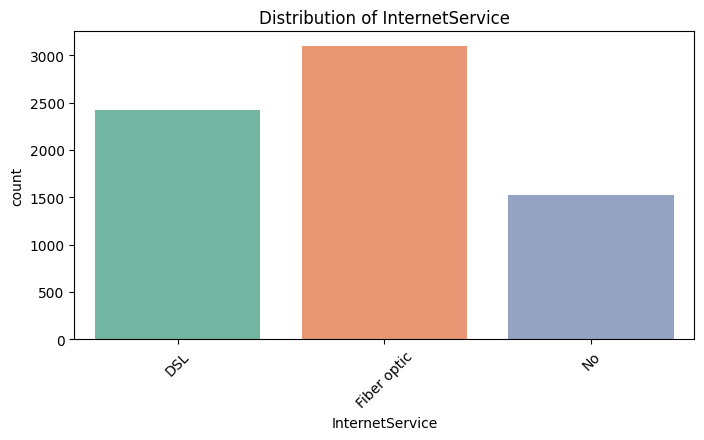

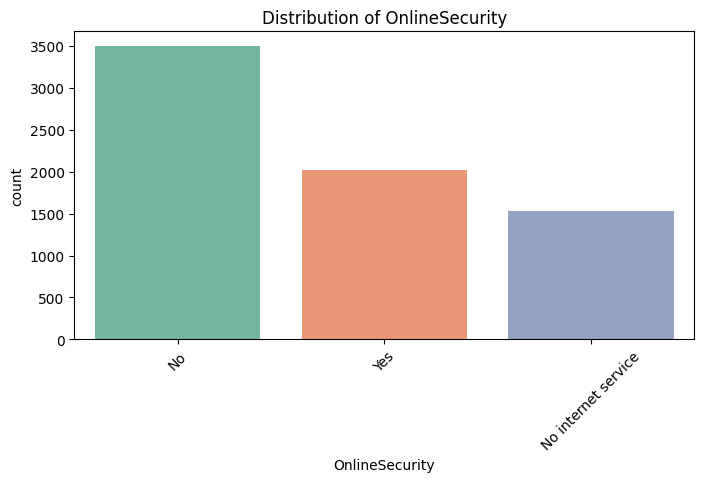

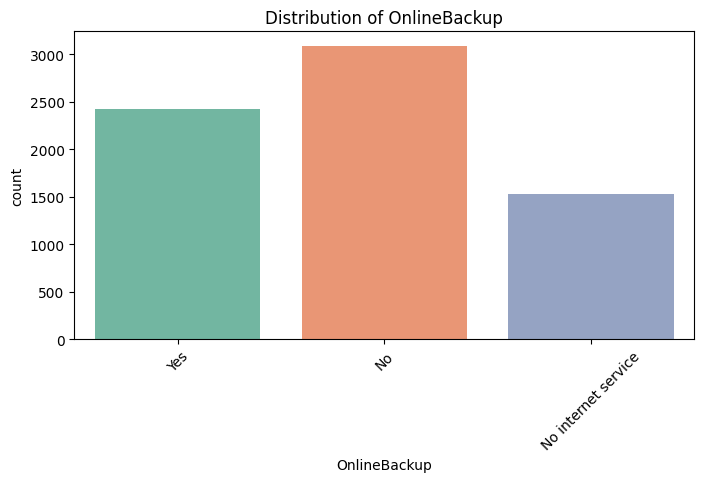

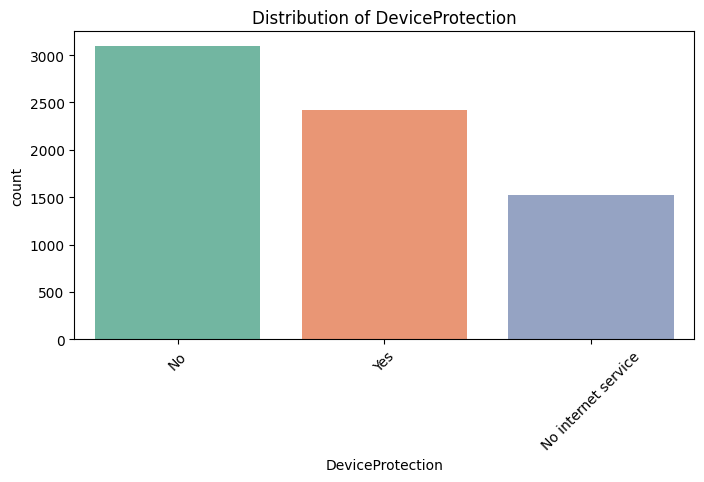

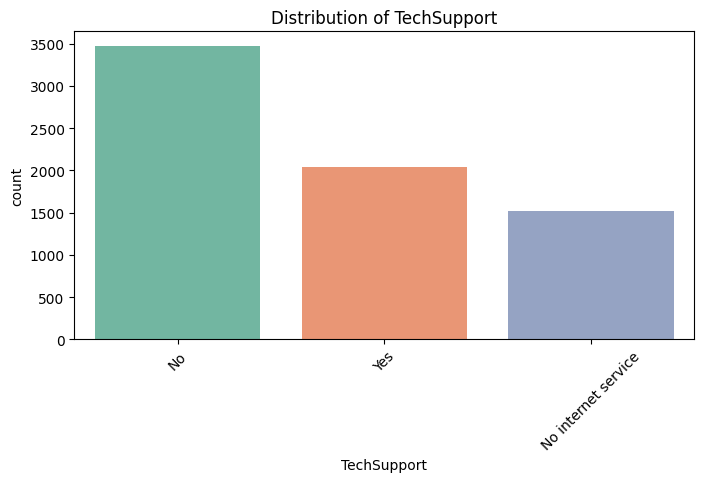

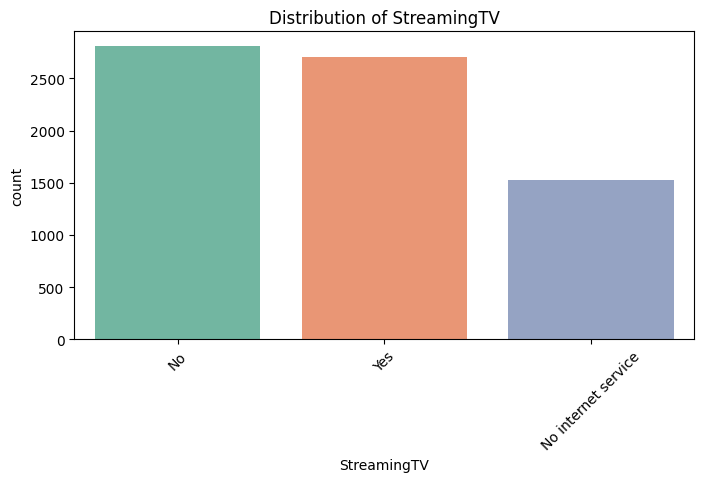

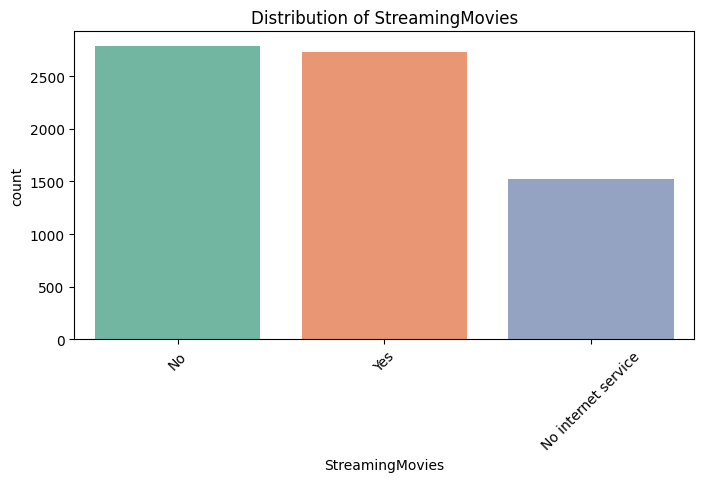

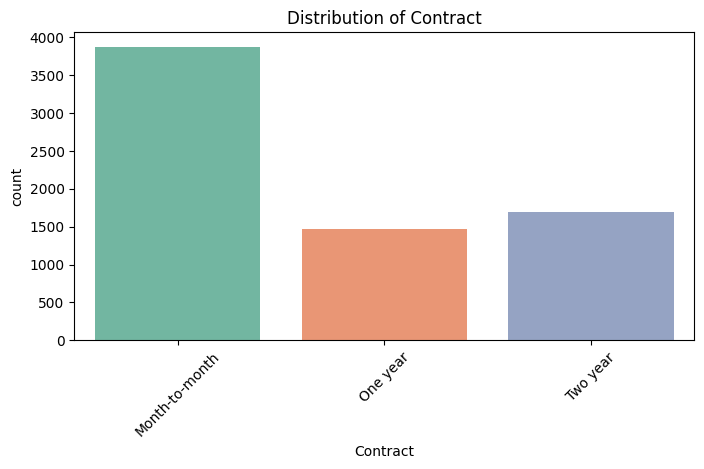

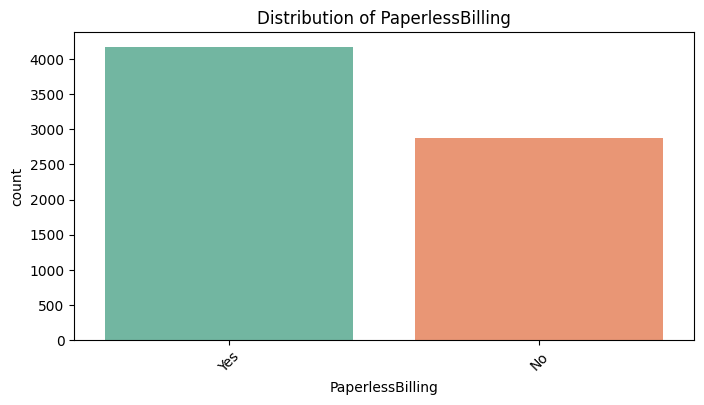

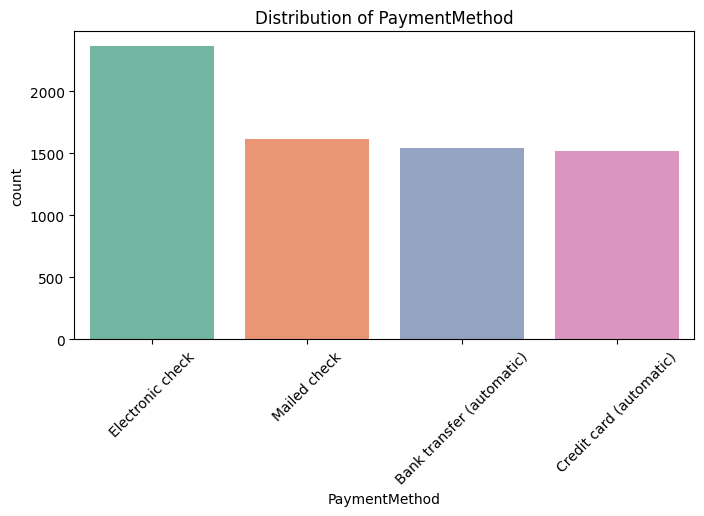

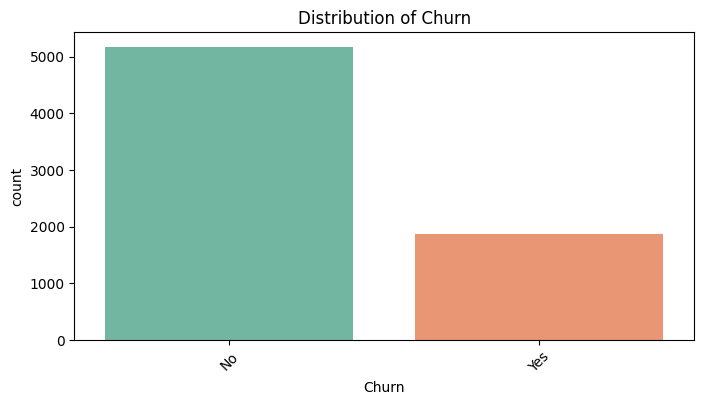

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Univariate Analysis
# Categorical features distribution
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f9f9f9; 
    border-radius: 10px; 
    font-family: 'Arial', sans-serif;
    line-height: 1.6;">

<h2 style="color: #2F4F4F; background-color: #e0f2f1; padding: 5px; border-radius: 5px;">🔢 Numerical Features Distribution</h2>

<p style="color: #333333;">
    Understanding the distribution of numerical features is crucial for analyzing patterns in the dataset. In this step, we plot histograms to visualize the distribution of all numerical variables. This helps in identifying outliers, skewness, and any specific patterns in the data.
</p>

<p style="color: #333333;">
    By visualizing these distributions, we can gain insights into the range of values, the presence of any anomalies, and the overall shape of the data. This step is essential before applying any machine learning models, as it guides feature scaling, transformations, and outlier handling.
</p>

</div>


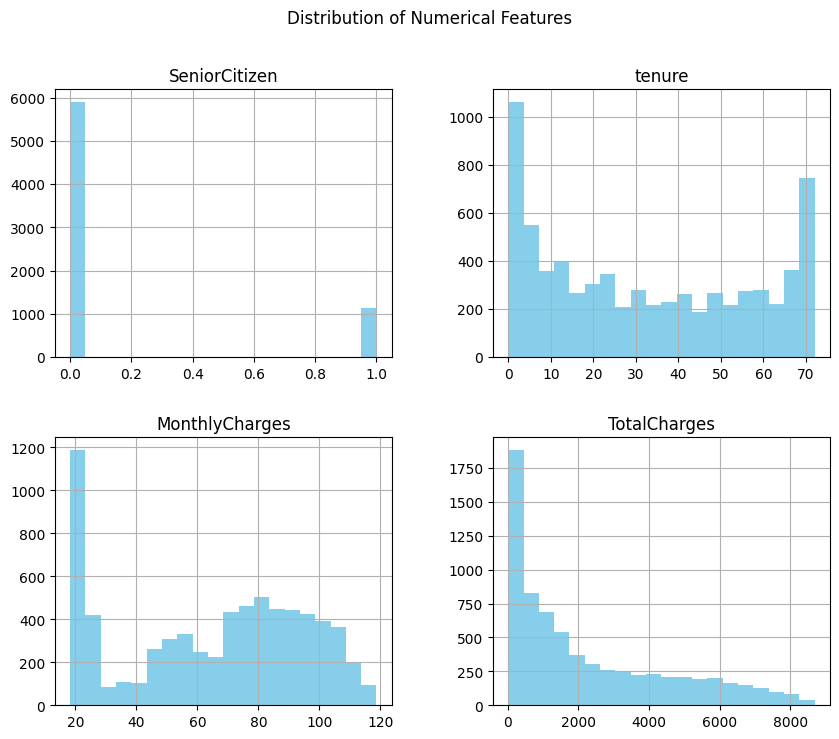

In [7]:
# Numerical features distribution
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features].hist(figsize=(10, 8), bins=20, color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f9f9f9; 
    border-radius: 10px; 
    font-family: 'Arial', sans-serif;
    line-height: 1.6;">

<h2 style="color: #2F4F4F;">📊 Bivariate Analysis: Churn vs Categorical Features</h2>

<p style="color: #333333;">
    In this step, we perform <strong>Bivariate Analysis</strong> to explore the relationship between the target variable <strong>Churn</strong> and each of the categorical features in the dataset.
    By visualizing these relationships, we can gain insights into how each feature impacts customer churn, helping us better understand the dataset and develop effective predictive models.
</p>

<h3 style="color: #2F4F4F;">Visualization Technique</h3>
<p style="color: #333333;">
    For each categorical feature, we use a <strong>Countplot</strong> to compare the distribution of churned and non-churned customers. This allows us to observe how different categories within each feature correlate with churn behavior.
</p>

<ul style="color: #333333;">
    <li>📊 <strong>Countplot:</strong> Displays the counts of customers for each category, segmented by the Churn status (Yes/No).</li>
    <li>🎨 <strong>Color Palette:</strong> We use the 'coolwarm' color palette to distinguish between the two churn classes.</li>
    <li>🔄 <strong>Rotation:</strong> The x-axis labels are rotated for better readability when dealing with long category names.</li>
</ul>

<h3 style="color: #2F4F4F;">Purpose of Bivariate Analysis</h3>
<p style="color: #333333;">
    The purpose of this analysis is to identify significant categorical features that have a strong influence on customer churn. These features can later be used for feature selection, model training, and further analysis.
</p>

</div>


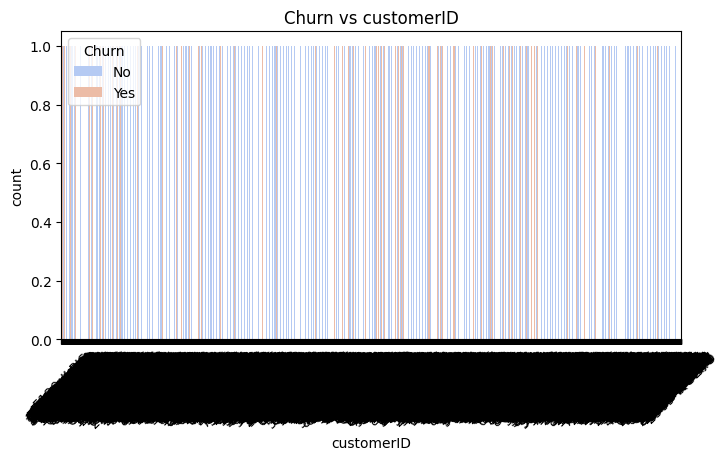

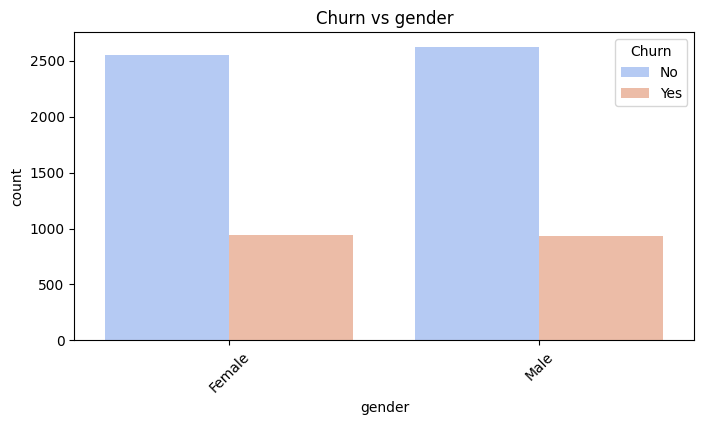

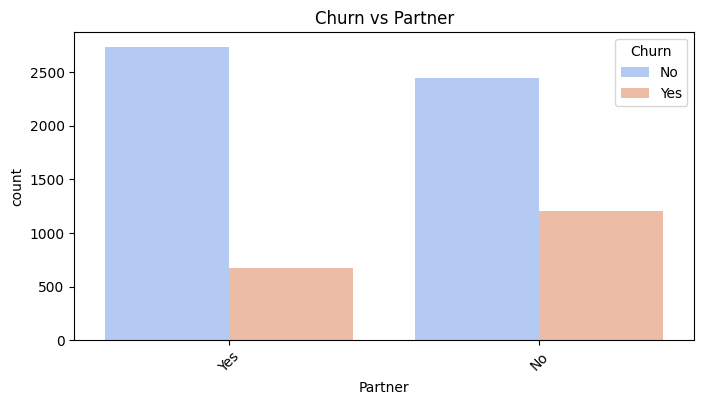

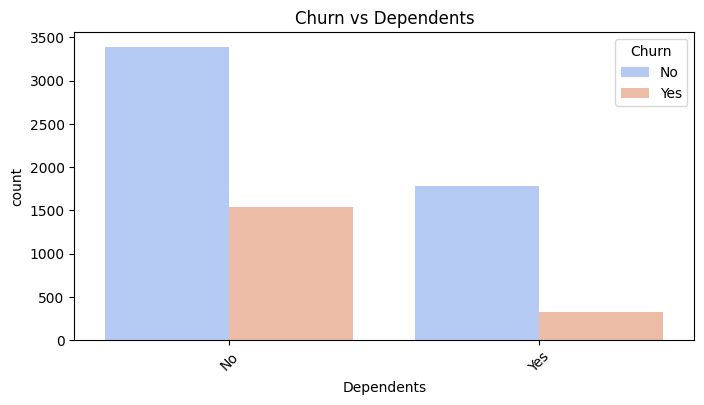

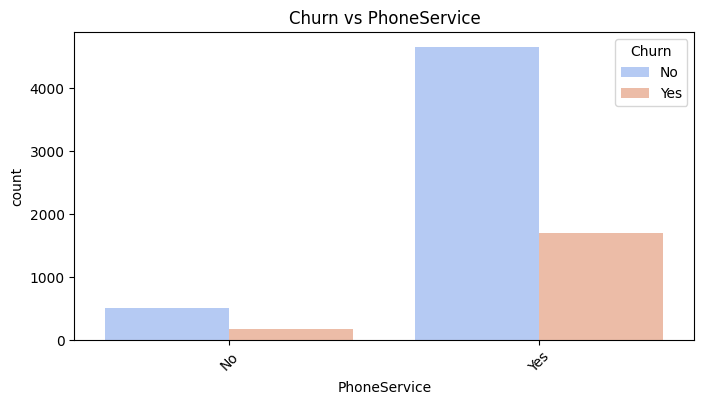

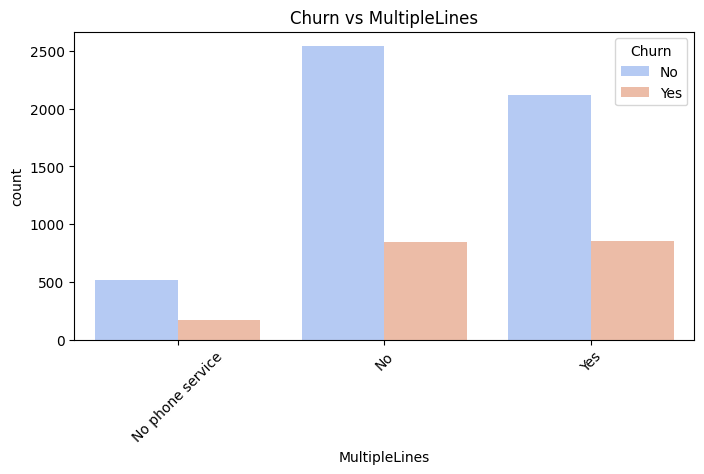

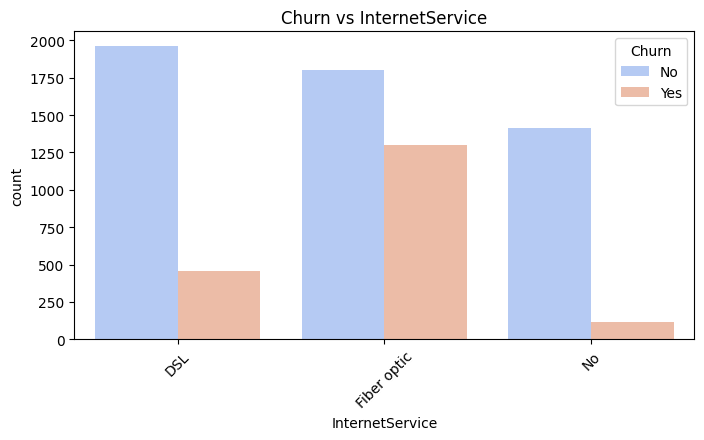

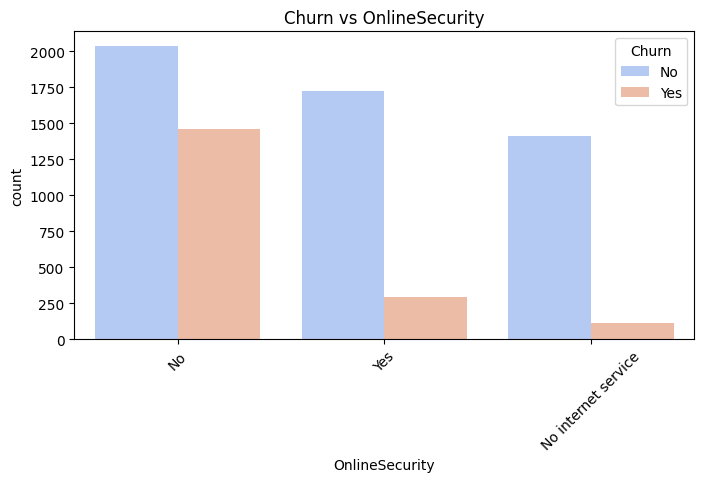

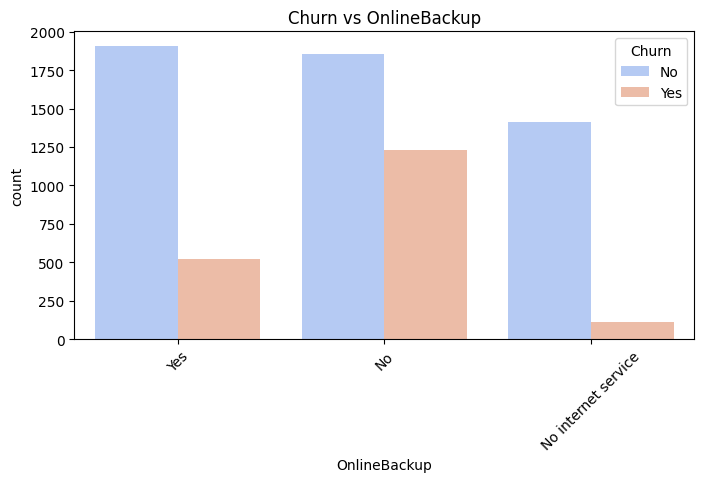

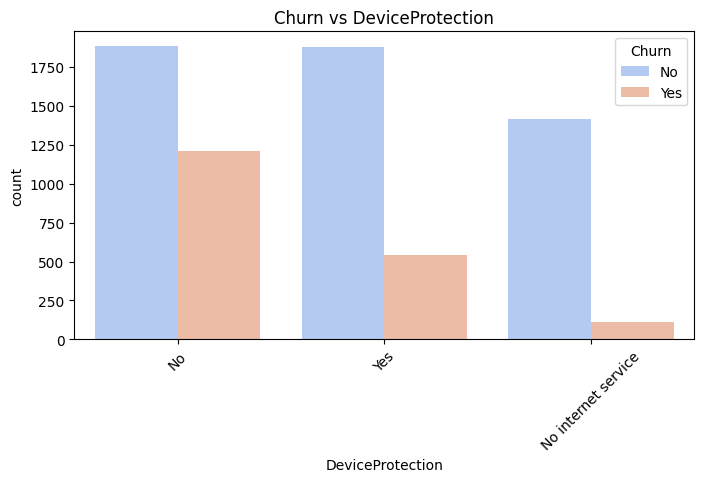

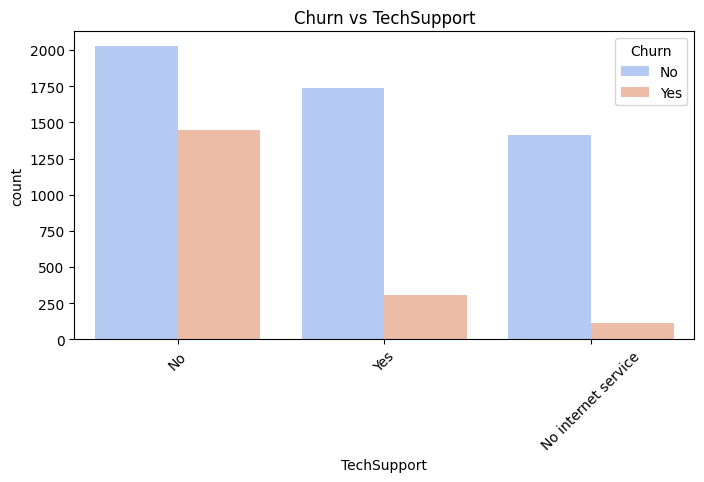

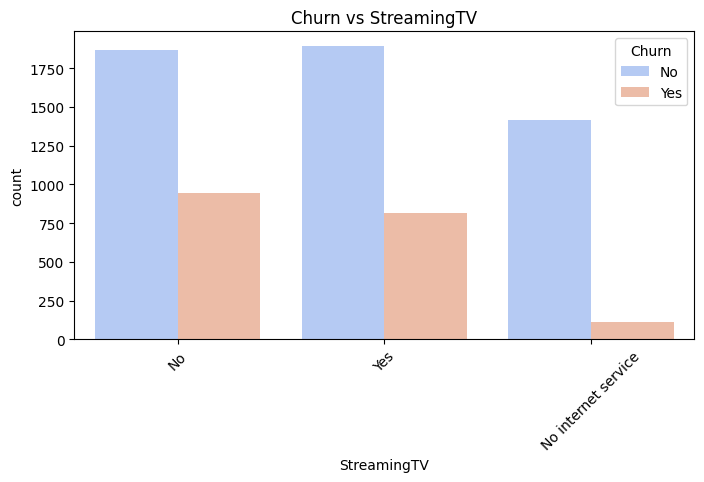

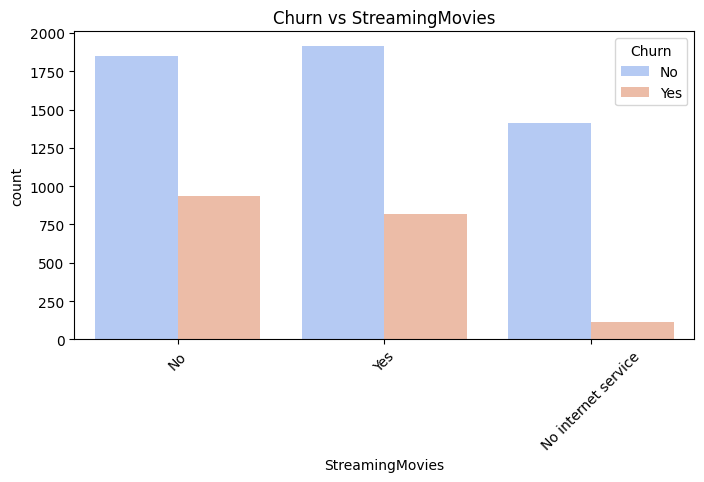

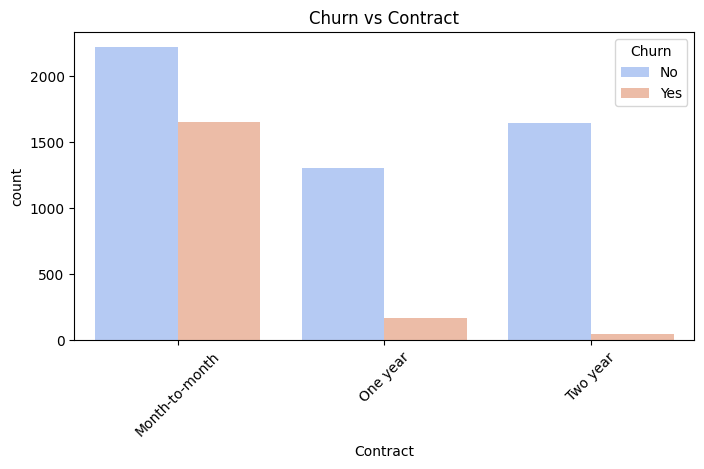

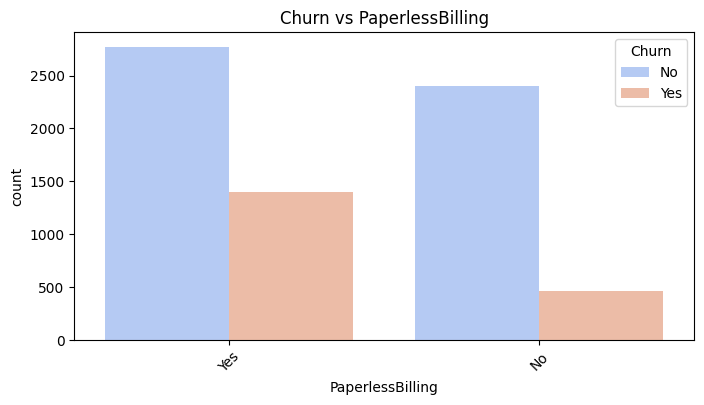

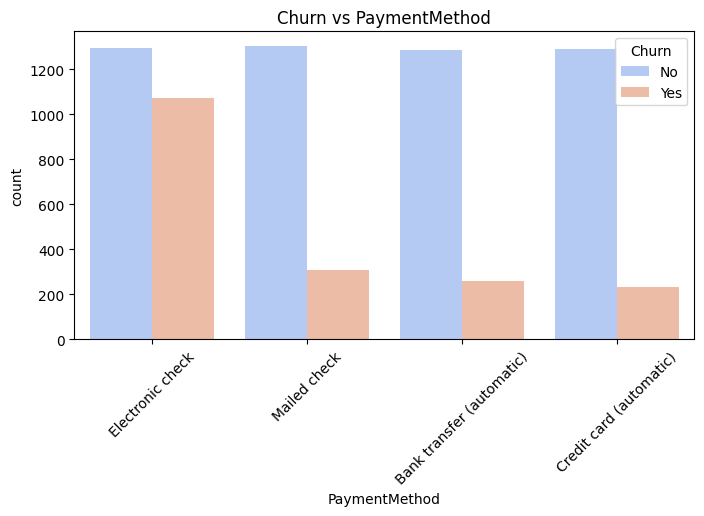

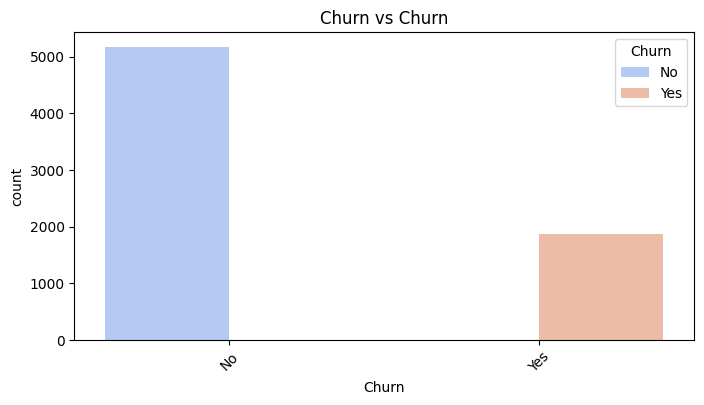

In [8]:
# 4. Bivariate Analysis
# Churn vs Categorical Features
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')
    plt.title(f'Churn vs {col}')
    plt.xticks(rotation=45)
    plt.show()

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f9f9f9; 
    border-radius: 10px; 
    font-family: 'Arial', sans-serif;
    line-height: 1.6;">

<h2 style="color: #2F4F4F;">📊 Churn vs Numerical Features (Boxplot)</h2>

<p style="color: #333333;">
    The following code snippet generates boxplots to visualize the distribution of numerical features with respect to customer churn. Boxplots are useful for understanding the spread and identifying potential outliers in numerical data based on different categories (in this case, churn status).
</p>

<p style="color: #333333;">
    Each boxplot shows the distribution of a numerical feature for churned and non-churned customers. The key components of the boxplot include:
</p>

<ul style="color: #333333;">
    <li>📦 <strong>Box:</strong> Represents the interquartile range (IQR) where the middle 50% of the data lies.</li>
    <li>🔲 <strong>Median Line:</strong> The line inside the box representing the median value of the feature.</li>
    <li>🟢 <strong>Whiskers:</strong> Lines extending from the box to show the range of the data.</li>
    <li>🔴 <strong>Outliers:</strong> Points outside the whiskers that are considered outliers.</li>
</ul>

<p style="color: #333333;">
    In this code:
</p>

<ul style="color: #333333;">
    <li>📊 <strong>Loop:</strong> Iterates through each numerical feature in the dataset.</li>
    <li>📏 <strong>Figure Size:</strong> Sets the size of each plot for better visibility.</li>
    <li>🎨 <strong>Color Palette:</strong> Uses the 'coolwarm' palette to differentiate between churn categories.</li>
    <li>🖼️ <strong>Display:</strong> Shows each boxplot with a title indicating the feature being analyzed.</li>
</ul>

<p style="color: #333333;">
    These visualizations help in understanding how different numerical features vary between churned and non-churned customers, potentially revealing patterns that can be used for predictive modeling.
</p>

</div>


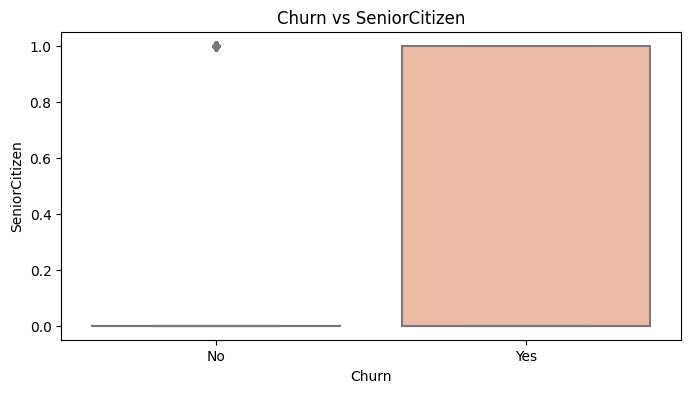

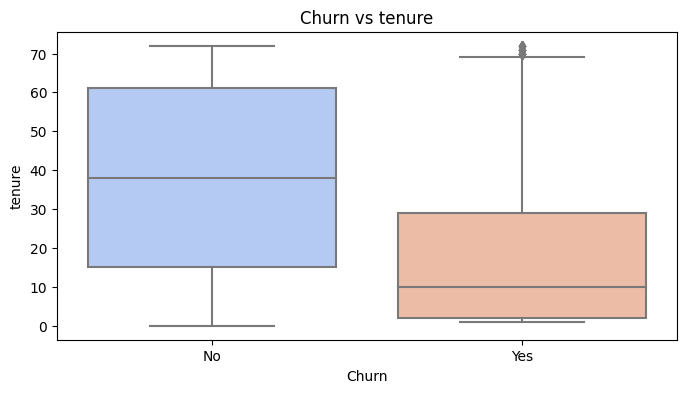

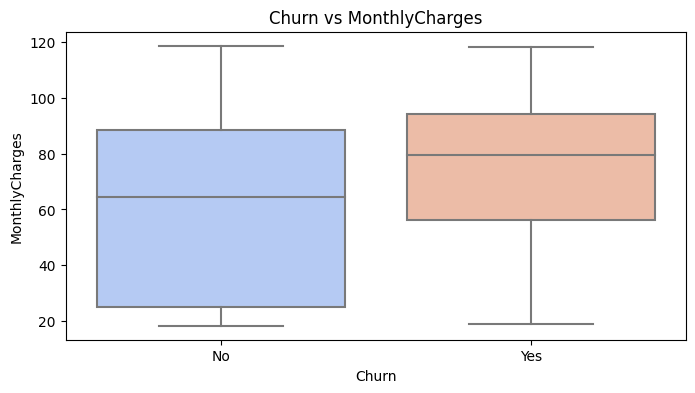

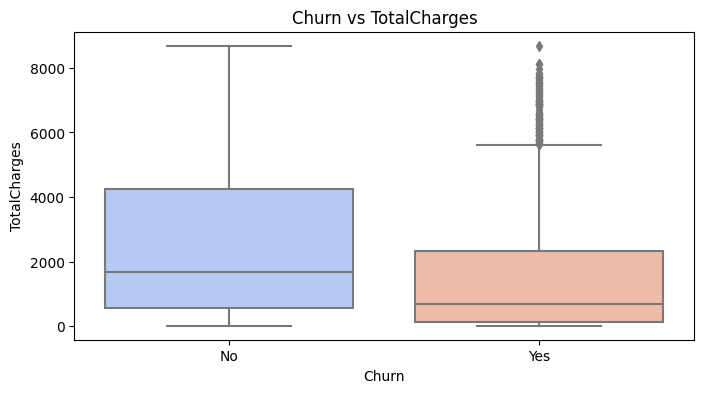

In [9]:
# Churn vs Numerical Features (Boxplot)
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Churn', y=col, palette='coolwarm')
    plt.title(f'Churn vs {col}')
    plt.show()

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f9f9f9; 
    border-radius: 10px; 
    font-family: 'Arial', sans-serif;
    line-height: 1.6;">

<h2 style="color: #2F4F4F;">🔍 Correlation Analysis</h2>

<p style="color: #333333;">
    <strong>Purpose:</strong> The correlation matrix helps in understanding the relationships between different numerical features in the dataset. It measures how strongly features are related to each other, which can provide insights into multicollinearity and potential feature selection.
</p>

<h3 style="color: #2F4F4F;">Correlation Matrix</h3>
<p style="color: #333333;">
    The correlation matrix is visualized using a heatmap. In this heatmap:
</p>

<ul style="color: #333333;">
    <li>🟦 <strong>Blue</strong> indicates a strong negative correlation between features.</li>
    <li>🟥 <strong>Red</strong> indicates a strong positive correlation between features.</li>
    <li>🔲 The color gradient represents the strength of the correlation, with darker colors indicating stronger correlations.</li>
</ul>

<p style="color: #333333;">
    This visualization helps to identify which features are highly correlated, enabling us to make informed decisions about feature selection and data preprocessing.
</p>

</div>


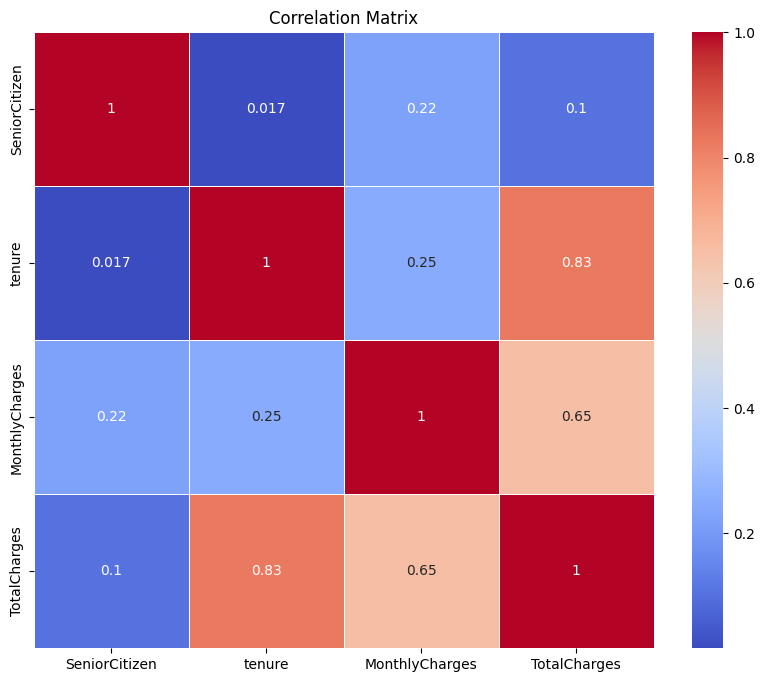

In [10]:
# 5. Correlation Analysis
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f9f9f9; 
    border-radius: 10px; 
    font-family: 'Arial', sans-serif;
    line-height: 1.6;">

<h2 style="color: #2F4F4F;">🔧 Feature Engineering</h2>

<p style="color: #333333;">
    This section focuses on feature engineering, a crucial step in preparing the data for machine learning models. Feature engineering involves transforming raw data into a format that better represents the underlying problem, improving the performance of machine learning models.
</p>

<h3 style="color: #2F4F4F;">1. Encoding Categorical Variables</h3>
<p style="color: #333333;">
    Categorical variables are encoded using <strong>LabelEncoder</strong> to convert them into numeric values. This transformation is necessary because many machine learning algorithms require numeric input. Each category is assigned a unique integer value to facilitate model training.
</p>

<h3 style="color: #2F4F4F;">2. Checking Correlation with Target Variable</h3>
<p style="color: #333333;">
    We analyze the correlation between each feature and the target variable, <strong>'Churn'</strong>. This step helps us understand the relationship between the features and the target, allowing us to identify which features have a stronger impact on predicting customer churn. The correlation values guide us in selecting the most relevant features for model training.
</p>

</div>


In [11]:
# 6. Feature Engineering
# Encoding categorical variables using LabelEncoder for model preparation
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])
# Check correlation with target variable (Churn)
correlation_with_churn = df.corr()['Churn'].sort_values(ascending=False)
print("\nCorrelation with Churn:\n", correlation_with_churn)


Correlation with Churn:
 Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199484
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f9f9f9; 
    border-radius: 10px; 
    font-family: 'Arial', sans-serif;
    line-height: 1.6;">

<h2 style="color: #2F4F4F;">🗂 Data Preparation</h2>

<p style="color: #333333;">
    In this step, we prepare the dataset for modeling by performing the following operations:
</p>

<h3 style="color: #2F4F4F;">1. Dropping Unnecessary Columns</h3>
<p style="color: #333333;">
    The <strong>'customerID'</strong> and <strong>'TotalCharges'</strong> columns are removed from the dataset as they are not needed for model training. The <code>df.drop()</code> function is used with the <code>axis=1</code> parameter to drop columns, and <code>inplace=True</code> ensures the changes are applied directly to the DataFrame.
</p>

<h3 style="color: #2F4F4F;">2. Separating Features and Target</h3>
<p style="color: #333333;">
    The dataset is split into features (X) and target (y). <strong>X</strong> contains all features except the target variable <strong>'Churn'</strong>, which is assigned to <strong>y</strong>. This separation is crucial for training machine learning models.
</p>

</div>


In [12]:
df.drop(['customerID', 'TotalCharges'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [13]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

In [14]:
X.shape

(7043, 18)

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f9f9f9; 
    border-radius: 10px; 
    font-family: 'Arial', sans-serif;
    line-height: 1.6;">

<h2 style="color: #2F4F4F;">📊 Data Preparation</h2>

<p style="color: #333333;">
    This section prepares the data for model training by splitting the dataset and applying feature scaling.
</p>

<h3 style="color: #2F4F4F;">1. Splitting the Dataset</h3>
<p style="color: #333333;">
    The dataset is divided into training and testing sets using <strong>train_test_split</strong>. The training set is used to train the model, while the testing set is used to evaluate its performance. We use a test size of <strong>20%</strong> and set a <strong>random state</strong> for reproducibility.
</p>

<h3 style="color: #2F4F4F;">2. Feature Scaling</h3>
<p style="color: #333333;">
    Features are standardized using <strong>StandardScaler</strong>. This ensures that each feature contributes equally to the model by scaling the data to have a mean of <strong>0</strong> and a standard deviation of <strong>1</strong>. The scaler is fitted on the training data and then applied to both the training and testing sets.
</p>

</div>


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f9f9f9; 
    border-radius: 10px; 
    font-family: 'Arial', sans-serif;
    line-height: 1.6;">

<h2 style="color: #2F4F4F;">⚙️ Model Evaluation</h2>

<p style="color: #333333;">
    This section involves evaluating multiple classification models to compare their performance. We use various classifiers to train and test the model on our dataset, then calculate the accuracy for each model.
</p>

<h3 style="color: #2F4F4F;">1. Model Training and Prediction</h3>
<p style="color: #333333;">
    We initialize several classifiers including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, K-Nearest Neighbors, Naive Bayes, and Gradient Boosting. Each classifier is trained on the training dataset and evaluated on the testing dataset.
</p>

<h3 style="color: #2F4F4F;">2. Accuracy Calculation</h3>
<p style="color: #333333;">
    After predicting the outcomes for the test set, we compute the accuracy of each model using the <strong>accuracy_score</strong> metric. The results are stored in a DataFrame for easy comparison.
</p>

</div>


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [18]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [19]:
model_accuracy = []

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracy.append({'Model': name, 'Accuracy': accuracy})

accuracy_df = pd.DataFrame(model_accuracy)

In [20]:
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.819730
1,Decision Tree,0.713982
2,Random Forest,0.791341
3,Support Vector Machine,0.806955
4,K-Nearest Neighbors,0.757275
5,Naive Bayes,0.757984
6,Gradient Boosting,0.810504


<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f9f9f9; 
    border-radius: 10px; 
    font-family: 'Arial', sans-serif;
    line-height: 1.6;">

<h2 style="color: #2F4F4F;">🔍 Hyperparameter Tuning with GridSearchCV</h2>

<p style="color: #333333;">
    We perform hyperparameter tuning for the <strong>Logistic Regression</strong> model using <strong>GridSearchCV</strong>. This process involves searching through a predefined set of hyperparameters to find the best combination for the model.
</p>

<h3 style="color: #2F4F4F;">Parameter Grid</h3>
<p style="color: #333333;">
    The grid search evaluates the following parameters:
</p>
<ul style="color: #333333;">
    <li><strong>penalty:</strong> Regularization type (L1, L2, ElasticNet, None).</li>
    <li><strong>C:</strong> Inverse of regularization strength, varying from 1e-4 to 1e4.</li>
    <li><strong>solver:</strong> Optimization algorithm (liblinear, saga).</li>
    <li><strong>max_iter:</strong> Number of iterations for convergence (100, 200, 500).</li>
</ul>

<p style="color: #333333;">
    The grid search uses 5-fold cross-validation to evaluate the performance of different hyperparameter combinations. The best parameters are identified based on accuracy.
</p>

</div>


In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that support l1 and elasticnet
    'max_iter': [100, 200, 500]
}

In [23]:
logreg = LogisticRegression()

In [24]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')


In [25]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [26]:
best_params = grid_search.best_params_
best_params

{'C': 0.08858667904100823, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [27]:
best_score = grid_search.best_score_
best_score

0.7992548475100907

In [28]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [29]:
test_accuracy

0.8197303051809794